# Channels

In [1]:
(ns opencv4.channels
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

In [2]:
(def s-mat (new-mat 3 3 CV_8UC1))
(.put s-mat 0 0 (byte-array [100 255 200 
                             100 255 200 
                             100 255 200]))
(dump s-mat)

(u/>>> (-> s-mat clone (resize! (new-size 30 30) 1 1 INTER_AREA)))

(def t-mat (new-mat 1 1 CV_32F))
(set-to t-mat (new-scalar 0.7))
(dump t-mat)

(-> s-mat
    (transform! t-mat)
    (dump))

(u/>>> (-> s-mat (resize! (new-size 30 30) 1 1 INTER_AREA)))

[100 255 200]
[100 255 200]
[100 255 200]
[0.69999999]
[70 178 140]
[70 178 140]
[70 178 140]


In [3]:
(def s-mat (new-mat 3 3 CV_8UC1))
(.put s-mat 0 0 (byte-array [100 255 200 
                             100 255 200 
                             100 255 200]))
(cvt-color! s-mat COLOR_GRAY2BGR)

(def t-mat (new-mat 3 3 CV_32F))
(.put t-mat 0 0 (float-array [2 0 0 
                              0 1 0 
                              0 0 1]))
(dump t-mat)

(-> s-mat
    (transform! t-mat)
    (dump))

(u/>>> (-> s-mat (resize! (new-size 30 30) 1 1 INTER_AREA)))

[2 0 0]
[0 1 0]
[0 0 1]
[200 100 100 255 255 255 255 200 200]
[200 100 100 255 255 255 255 200 200]
[200 100 100 255 255 255 255 200 200]


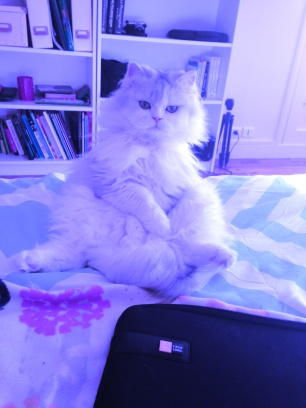

In [4]:
(def my-sister-cat   
  (-> "resources/chapter03/emilie1.jpg" (imread IMREAD_REDUCED_COLOR_8)))

(-> my-sister-cat   
  clone
  (transform! (u/matrix-to-mat [ [2 0 1.1] [0 1 0] [0 0 1]]))
  u/>>>)

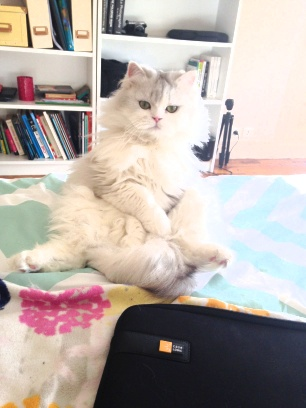

In [5]:
(-> my-sister-cat   
  clone
  (cvt-color! COLOR_BGR2HSV)
  (transform! (u/matrix-to-mat [ [1 0 0] [0 1 0] [0 0 1.5]]))
  (cvt-color! COLOR_HSV2BGR)
  u/>>>)

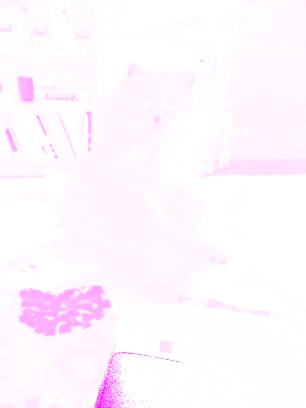

In [6]:
(def 
  usui-cat
  (-> my-sister-cat   
  clone
  (cvt-color! COLOR_BGR2YUV)
  (transform! (u/matrix-to-mat [
			  [20 0 0]
			  [0 1 0]
			  [0 0 1]]))
  (cvt-color! COLOR_YUV2BGR)
  (transform! (u/matrix-to-mat [[4 0 0]
                                [0 1 0]
                                [0 0 2]]))
  (cvt-color! COLOR_BGR2HSV)    
  (transform! (u/matrix-to-mat [[1 0 0]
                          [0 3 0]
                          [0 0 1]]))
  (cvt-color! COLOR_HSV2BGR)    
      ))

(u/>>> usui-cat)

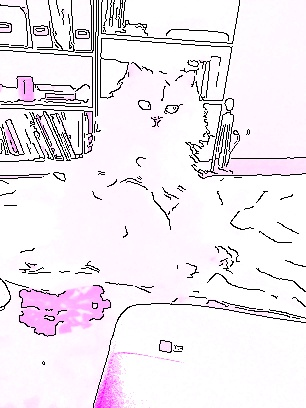

In [7]:
(def 
  line-cat
  (-> my-sister-cat 
      clone
  (cvt-color! COLOR_BGR2GRAY)
  (canny! 100.0 150.0 3 true)
  (cvt-color! COLOR_GRAY2BGR)
  (bitwise-not!)))

(u/>>> line-cat)

(def target (new-mat))
;(add-weighted usui-cat 1 line-cat 1 2 target)
(bitwise-and usui-cat line-cat target)
;(add usui-cat line-cat target)
(u/>>> target)